**FIRST LOOK**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = 'https://github.com/gr-oll/susFin/raw/refs/heads/main/Data/'

In [3]:
returns = pd.read_excel(filepath + 'DS_RI_USD_Y.xlsx')
returns.rename(columns={'NAME': 'Name'}, inplace=True)
returns_melted = returns.melt(id_vars=["Name", "ISIN"], var_name="year", value_name="returns")
returns_melted.head()

,Name,ISIN,year,returns
0,SCHLUMBERGER,AN8068571086,1999,1418.81
1,ALUAR,ARALUA010258,1999,1198.09
2,BANCO BBVA ARGENTINA,ARP125991090,1999,295.67
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1999,65.06
4,STRABAG SE,AT000000STR1,1999,NaN


In [4]:
static = pd.read_excel(filepath + 'Static.xlsx')
static.head()

,ISIN,Name,Country,Region
0,AN8068571086,SCHLUMBERGER,US,AMER
1,ARALUA010258,ALUAR,AR,EM
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM
4,AT000000STR1,STRABAG SE,AT,EUR


In [5]:
esg_score = pd.read_excel(filepath + 'DS_EScore_Y.xlsx')
esg_score.rename(columns={'NAME': 'Name'}, inplace=True)
esg_score_melted = esg_score.melt(id_vars=["Name", "ISIN"], var_name="year", value_name="esg_score")
esg_score_melted.head()

,Name,ISIN,year,esg_score
0,SCHLUMBERGER,AN8068571086,1999,NaN
1,ALUAR,ARALUA010258,1999,NaN
2,BANCO BBVA ARGENTINA,ARP125991090,1999,NaN
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1999,NaN
4,STRABAG SE,AT000000STR1,1999,NaN


In [6]:
market_value = pd.read_excel(filepath + 'DS_MV_USD_Y.xlsx')
market_value.rename(columns={'NAME': 'Name'}, inplace=True)
market_value_melted = market_value.melt(id_vars=["Name", "ISIN"], var_name="year", value_name="market_value")
market_value_melted.head()

,Name,ISIN,year,market_value
0,SCHLUMBERGER,AN8068571086,1999,26510.16
1,ALUAR,ARALUA010258,1999,897.03
2,BANCO BBVA ARGENTINA,ARP125991090,1999,948.87
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1999,510.97
4,STRABAG SE,AT000000STR1,1999,NaN


In [7]:
revenues = pd.read_excel(filepath + 'DS_REV_USD_Y.xlsx')
revenues.rename(columns={'NAME': 'Name'}, inplace=True)
revenues_melted = revenues.melt(id_vars=["Name", "ISIN"], var_name="year", value_name="revenues")
revenues_melted.head()

,Name,ISIN,year,revenues
0,SCHLUMBERGER,AN8068571086,1999,11815553
1,ALUAR,ARALUA010258,1999,502671
2,BANCO BBVA ARGENTINA,ARP125991090,1999,1369363
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1999,1231056
4,STRABAG SE,AT000000STR1,1999,NaN


In [8]:
data = pd.merge(returns_melted, esg_score_melted, on=['Name','ISIN','year'], how='outer')
data = pd.merge(data, market_value_melted, on=['Name','ISIN','year'], how='outer')
data = pd.merge(data, revenues_melted, on=['Name','ISIN','year'], how='outer')
data = pd.merge(data, static, on=['Name','ISIN'], how='outer')

In [9]:
data.head()

,Name,ISIN,year,returns,esg_score,market_value,revenues,Country,Region
0,3I GROUP,GB00B1YW4409,1999,416.75,NaN,5909.77,515963,GB,EUR
1,3I GROUP,GB00B1YW4409,2000,664.97,NaN,10807.28,536733.0,GB,EUR
2,3I GROUP,GB00B1YW4409,2001,823.77,NaN,11806.05,476189.0,GB,EUR
3,3I GROUP,GB00B1YW4409,2002,444.54,32.54,6058.66,526583.0,GB,EUR
4,3I GROUP,GB00B1YW4409,2003,356.10,35.19,4539.76,496128.0,GB,EUR


In [10]:
pacific = data[data['Region'] == 'PAC']

In [11]:
pacific.head()

,Name,ISIN,year,returns,esg_score,market_value,revenues,Country,Region
78,77 BANK,JP3352000008,1999,1.14,NaN,3420.91,1171456,JP,PAC
79,77 BANK,JP3352000008,2000,1.03,NaN,2798.16,1391457.0,JP,PAC
80,77 BANK,JP3352000008,2001,0.67,NaN,2009.56,1236040.0,JP,PAC
81,77 BANK,JP3352000008,2002,0.48,NaN,1449.4,1192133.0,JP,PAC
82,77 BANK,JP3352000008,2003,0.48,NaN,1420.22,1089194.0,JP,PAC


In [12]:
pacific.shape

(13390, 9)

In [13]:
pacific['Country'].unique()

array(['JP', 'AU', 'NZ', 'HK', 'SG'], dtype=object)

In [14]:
pacific.isna().sum()

Name               0
ISIN               0
year               0
returns          384
esg_score       4053
market_value     360
revenues         419
Country            0
Region             0
dtype: int64

In [15]:
data.dtypes

Name             object
ISIN             object
year             object
returns         float64
esg_score       float64
market_value     object
revenues         object
Country          object
Region           object
dtype: object

In [16]:
data['market_value'].dtype

dtype('O')

In [17]:
data['year'] = data['year'].astype(int)
data['returns'] = data['returns'].astype(float)
data['esg_score'] = data['esg_score'].astype(float)
data['market_value'] = pd.to_numeric(data['market_value'], errors='coerce').astype(float)
data['revenues'] = pd.to_numeric(data['revenues'], errors='coerce').astype(float)
data['Name'] = data['Name'].astype(str)
data['ISIN'] = data['ISIN'].astype(str)
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)

In [18]:
data.describe(include='all')

,Name,ISIN,year,returns,esg_score,market_value,revenues,Country,Region
count,66820,66820,66820.000000,6.331200e+04,43178.000000,6.341000e+04,6.415500e+04,66820,66820
unique,2569,2565,NaN,NaN,NaN,NaN,NaN,55,7
top,SIEMENS,GB00B1P6ZR11,NaN,NaN,NaN,NaN,NaN,US,EM
freq,52,52,NaN,NaN,NaN,NaN,NaN,15600,18460
mean,NaN,NaN,2011.500000,2.459883e+04,48.019783,1.381873e+04,1.112054e+07,NaN,NaN
std,NaN,NaN,7.500056,4.529883e+05,28.592320,4.520962e+04,2.674156e+07,NaN,NaN
min,NaN,NaN,1999.000000,0.000000e+00,0.000000,0.000000e+00,-1.942906e+07,NaN,NaN
25%,NaN,NaN,2005.000000,1.831000e+01,24.062500,1.538300e+03,1.178964e+06,NaN,NaN
50%,NaN,NaN,2011.500000,3.148900e+02,51.065000,4.121360e+03,3.415351e+06,NaN,NaN
75%,NaN,NaN,2018.000000,2.711117e+03,72.360000,1.136890e+04,9.978684e+06,NaN,NaN


In [19]:
data['year'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024])

**EXERCISE 1**

In [20]:
#monthly_return_melted

In [21]:
monthly_return = pd.read_excel(filepath + 'DS_RI_USD_M.xlsx')
monthly_return_melted = monthly_return.melt(id_vars=["NAME", "ISIN"], var_name="year", value_name="monthly_return")
monthly_return_melted.rename(columns={'NAME': 'Name'}, inplace=True)
monthly_return_melted.head()

,Name,ISIN,year,monthly_return
0,SCHLUMBERGER,AN8068571086,1999-12-31 00:00:00,1708.01
1,ALUAR,ARALUA010258,1999-12-31 00:00:00,1547.04
2,BANCO BBVA ARGENTINA,ARP125991090,1999-12-31 00:00:00,418.23
3,TERNIUM ARGENTINA SOCIEDAD ANONIMA,ARSIDE010029,1999-12-31 00:00:00,178.40
4,STRABAG SE,AT000000STR1,1999-12-31 00:00:00,NaN


In [22]:
static.head()

,ISIN,Name,Country,Region
0,AN8068571086,SCHLUMBERGER,US,AMER
1,ARALUA010258,ALUAR,AR,EM
2,ARP125991090,BANCO BBVA ARGENTINA,AR,EM
3,ARSIDE010029,TERNIUM ARGENTINA SOCIEDAD ANONIMA,AR,EM
4,AT000000STR1,STRABAG SE,AT,EUR


In [23]:
df_ex1 = pd.merge(monthly_return_melted, static, on=['Name','ISIN'], how='outer')
df_ex1.head()

,Name,ISIN,year,monthly_return,Country,Region
0,3I GROUP,GB00B1YW4409,1999-12-31 00:00:00,736.78,GB,EUR
1,3I GROUP,GB00B1YW4409,2000-01-31 00:00:00,683.30,GB,EUR
2,3I GROUP,GB00B1YW4409,2000-02-29 00:00:00,736.69,GB,EUR
3,3I GROUP,GB00B1YW4409,2000-03-31 00:00:00,869.86,GB,EUR
4,3I GROUP,GB00B1YW4409,2000-04-28 00:00:00,834.43,GB,EUR


In [24]:
df_ex1 = df_ex1[df_ex1['Region'] == 'PAC']
df_ex1 = df_ex1[(pd.to_datetime(df_ex1['year']) >= '2013-12-31') & (pd.to_datetime(df_ex1['year']) <= '2023-12-31')]


In [25]:
#df_ex1['year'] = pd.to_datetime(df_ex1['year'], format="%Y-%M.%D")

In [26]:
df_ex1.sort_values(by=['Name', 'year'], inplace=True)
df_ex1

,Name,ISIN,year,monthly_return,Country,Region
1074,77 BANK,JP3352000008,2013-12-31 00:00:00,0.68,JP,PAC
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC
...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC


In [27]:
df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()

/var/folders/pg/ms9txxdj6xj6l0sxpljp5j940000gn/T/ipykernel_49156/1692366612.py:1: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_ex1['individual_monthly_return'] = df_ex1.groupby('Name')['monthly_return'].pct_change()


In [28]:
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1074,77 BANK,JP3352000008,2013-12-31 00:00:00,0.68,JP,PAC,NaN
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [29]:
df_ex1.dropna(subset=['individual_monthly_return'], inplace=True)

In [30]:
df_ex1

,Name,ISIN,year,monthly_return,Country,Region,individual_monthly_return
1075,77 BANK,JP3352000008,2014-01-31 00:00:00,0.66,JP,PAC,-0.029412
1076,77 BANK,JP3352000008,2014-02-28 00:00:00,0.62,JP,PAC,-0.060606
1077,77 BANK,JP3352000008,2014-03-31 00:00:00,0.64,JP,PAC,0.032258
1078,77 BANK,JP3352000008,2014-04-30 00:00:00,0.64,JP,PAC,0.000000
1079,77 BANK,JP3352000008,2014-05-30 00:00:00,0.68,JP,PAC,0.062500
...,...,...,...,...,...,...,...
770389,YUEXIU PROPERTY COMPANY,HK0000745908,2023-08-31 00:00:00,62.82,HK,PAC,-0.055906
770390,YUEXIU PROPERTY COMPANY,HK0000745908,2023-09-29 00:00:00,58.43,HK,PAC,-0.069882
770391,YUEXIU PROPERTY COMPANY,HK0000745908,2023-10-31 00:00:00,54.23,HK,PAC,-0.071881
770392,YUEXIU PROPERTY COMPANY,HK0000745908,2023-11-30 00:00:00,47.52,HK,PAC,-0.123732


In [31]:
annualization_mean = df_ex1.groupby('Name')['individual_monthly_return'].mean()
annualization_mean = pd.DataFrame(annualization_mean)
annualization_mean.rename(columns={'individual_monthly_return': 'monthly_mean'}, inplace=True)

annualization_var = df_ex1.groupby('Name')['individual_monthly_return'].std()
annualization_var = pd.DataFrame(annualization_var)
annualization_var.rename(columns={'individual_monthly_return': 'monthly_std'}, inplace=True)

annualization = pd.merge(annualization_mean, annualization_var, on='Name', how='outer')

In [32]:
annualization['annualized_mean'] = annualization['monthly_mean'] * 12
annualization['annualized_std'] = annualization['monthly_std'] * np.sqrt(12)

In [33]:
annualization.head()

,monthly_mean,monthly_std,annualized_mean,annualized_std
Name,,,,
77 BANK,0.005268,0.074258,0.063219,0.257238
A2B AUSTRALIA DEAD - DELIST.12/04/24,0.004838,0.116616,0.058059,0.403969
ABC-MART,0.005466,0.063681,0.065592,0.220597
ACOM,0.000984,0.075747,0.011807,0.262394
ADBRI DEAD - DELIST.02/07/24,0.006191,0.117313,0.074295,0.406385


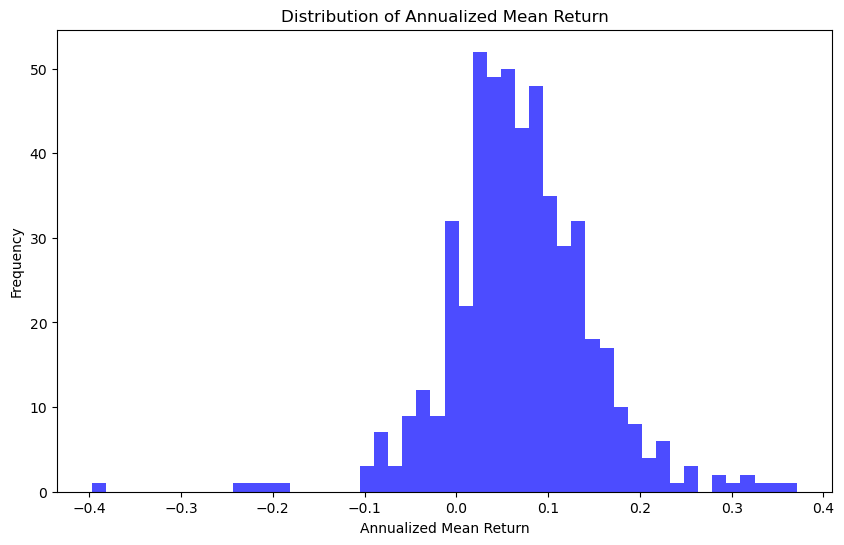

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_mean'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Mean Return')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Mean Return')
plt.show()

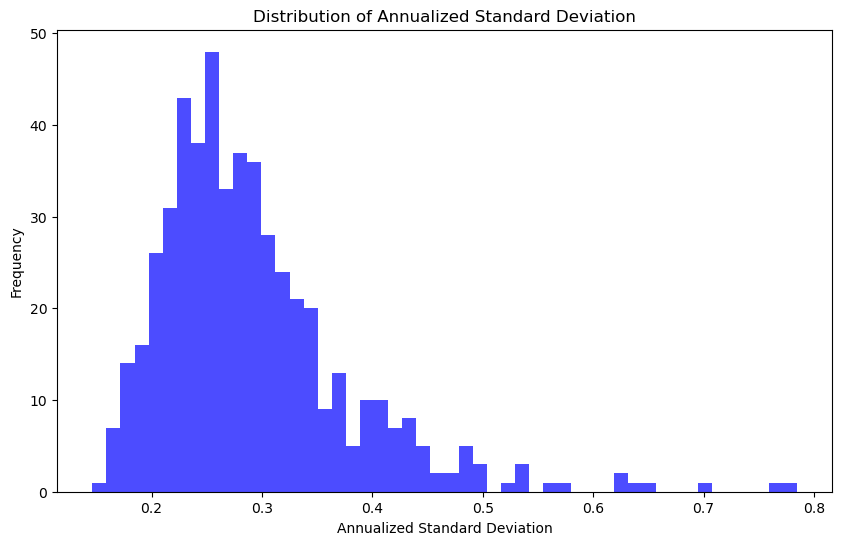

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(annualization['annualized_std'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Annualized Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Annualized Standard Deviation')
plt.show()

In [36]:
np.corrcoef(annualization['annualized_mean'], annualization['annualized_std'])

array([[1.       , 0.0990692],
       [0.0990692, 1.       ]])

In [37]:
annualization[annualization['annualized_std'] == annualization['annualized_std'].max()]

,monthly_mean,monthly_std,annualized_mean,annualized_std
Name,,,,
HUABAO INTL.HDG.,0.0205,0.226446,0.245997,0.784433


In [38]:
annualization[annualization['annualized_mean'] > annualization['annualized_mean'].quantile(0.99)].sort_values(by='annualized_mean', ascending=False)

,monthly_mean,monthly_std,annualized_mean,annualized_std
Name,,,,
ORIENT OVERSEAS (INTL.),0.030910,0.155367,0.370925,0.538206
ADVANTEST,0.028719,0.125831,0.344622,0.435892
KAWASAKI KISEN KAISHA,0.027203,0.151911,0.326431,0.526234
TOKYO ELECTRON,0.027040,0.104035,0.324484,0.360390
ST BARBARA,0.025798,0.219952,0.309578,0.761937
OZ MINERALS DEAD - DELIST.03/05/23,0.024705,0.116057,0.296456,0.402034


In [39]:
annualization[annualization['annualized_std'] > annualization['annualized_std'].quantile(0.99)].sort_values(by='annualized_std', ascending=False)

,monthly_mean,monthly_std,annualized_mean,annualized_std
Name,,,,
HUABAO INTL.HDG.,0.020500,0.226446,0.245997,0.784433
ST BARBARA,0.025798,0.219952,0.309578,0.761937
ENERGY RES.OF AUS.,0.001675,0.201768,0.020100,0.698944
TELEVISION BROADCASTS,-0.007785,0.187136,-0.093420,0.648258
HILLS DEAD - DELIST.29/08/23,-0.017923,0.184319,-0.215080,0.638501
LEOPALACE21,0.011545,0.180323,0.138534,0.624659


In [40]:
annualization.shape

(515, 4)